# Toy 02a: mixing appearance and position

HOWTO: run the dataset & model cells, then run either of the solution cells following by the analysis cell.

In [3]:
%load_ext autoreload

### Dataset: variable position mix

In [102]:
%autoreload
import datasets

settings_by_position_mix = {
    '6/0': (3, 0),
    '4/2': (2, 2),
    '2/4': (1, 4),
    '0/6': (0, 6),
}

settings = {}
for mix, (n_mixed, n_appearance) in settings_by_position_mix.items():
    images, labels, n_classes, sort_groups, = datasets.dataset_mixed_position(n_mixed, n_appearance)
    print(mix, images.shape)
    settings[mix] = (images, labels, n_classes, sort_groups)

6/0 torch.Size([108, 7, 6, 6])
4/2 torch.Size([144, 7, 6, 6])
2/4 torch.Size([180, 7, 6, 6])
0/6 torch.Size([216, 7, 6, 6])


In [103]:
# DEBUG
images, labels, n_classes, sort_groups, = datasets.dataset_mixed_position(0, 2, input_d=3)

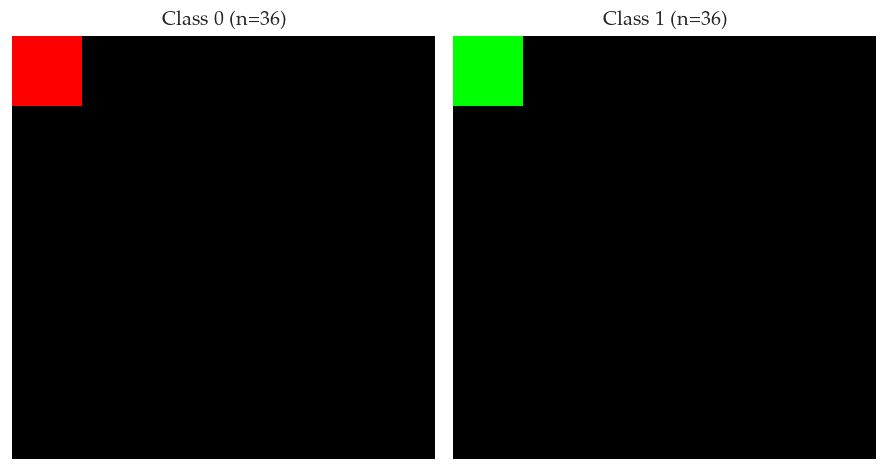

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Palatino"]})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

fig, axs = plt.subplots(1, n_classes, figsize=(1.5 + n_classes * 3, 6), dpi=120)
# images, labels, n_classes, _ = settings['0/2']
j = 0
for c in range(n_classes):
    for i in range(1):
        inds = labels == c
        plot_img = images[inds][i].permute((1, 2, 0))
        axs[j].imshow(plot_img)
        axs[j].set_title(f"Class {labels[inds][i]} (n={inds.sum()})")
        axs[j].axis('off')
        j += 1
# axs[k,0].set_title(f"Mixing {mix}")

plt.tight_layout()
pass

## Model

In [25]:
%autoreload
from toy_models import TriViTalAbsolutePosition

# Training solution

In [2]:
%autoreload
from experiments import run as run_mixed

UsageError: Line magic function `%autoreload` not found.


### APE - all WD results

In [10]:
import pandas as pd

results = 'results/02a-mixed.csv'
with open(results, 'r') as f:
    df = pd.read_csv(results, sep=",")

# Remove rows where mean_acc is below 1.0
# df['mean_acc'] = df['mean_acc'].astype(float)
df = df[df['mean_acc'] == 1.0]

# Set Pandas to display all rows
pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_rows', None)

df['mean_total_position'] = df['mean_position'] + df['mean_relative_position']
df['std_total_position'] = df['std_position'] + df['std_relative_position']

df

,Unnamed: 0,mean_acc,mean_appearance,std_appearance,mean_position,std_position,mean_relative_position,std_relative_position,lr,pos_emb_factor,weight_decay,position_mix,d,n_heads,target,attribution_method,pe,input_d,pos_emb_add,mean_total_position,std_total_position
0,0,1.0,0.354832,0.000000,0.645168,0.000000,0.0,0.0,0.004,0.1,0.000000e+00,6/0,4,2,loss_all_classes,input_gradient_withnegative,APE,7,add,0.645168,0.000000
1,1,1.0,0.351611,0.000000,0.648389,0.000000,0.0,0.0,0.004,0.1,1.000000e-08,6/0,4,2,loss_all_classes,input_gradient_withnegative,APE,7,add,0.648389,0.000000
2,2,1.0,0.340641,0.000000,0.659359,0.000000,0.0,0.0,0.004,0.1,1.000000e-07,6/0,4,2,loss_all_classes,input_gradient_withnegative,APE,7,add,0.659359,0.000000
3,3,1.0,0.356226,0.000000,0.643774,0.000000,0.0,0.0,0.004,0.1,1.000000e-06,6/0,4,2,loss_all_classes,input_gradient_withnegative,APE,7,add,0.643774,0.000000
5,5,1.0,0.340851,0.000000,0.659149,0.000000,0.0,0.0,0.004,0.1,1.000000e-04,6/0,4,2,loss_all_classes,input_gradient_withnegative,APE,7,add,0.659149,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,43,1.0,0.392395,0.181479,0.607605,0.181479,0.0,0.0,0.040,0.1,1.000000e-04,0/5,12,6,pred_class,input_gradient_withnegative,APE,7,add,0.607605,0.181479
1545,44,1.0,0.352539,0.154771,0.647461,0.154771,0.0,0.0,0.040,0.1,1.000000e-04,0/6,12,6,pred_class,input_gradient_withnegative,APE,7,add,0.647461,0.154771
1546,45,1.0,0.513343,0.107135,0.486657,0.107135,0.0,0.0,0.040,0.1,1.000000e-03,0/2,12,6,pred_class,input_gradient_withnegative,APE,7,add,0.486657,0.107135
1547,46,1.0,0.592461,0.128906,0.407539,0.128906,0.0,0.0,0.040,0.1,1.000000e-03,0/3,12,6,pred_class,input_gradient_withnegative,APE,7,add,0.407539,0.128906


In [11]:
show_df = df.copy()

show_df = show_df[show_df['weight_decay'] >= 1e-6]
show_df = show_df[show_df['weight_decay'] <= 1e-2]
# show_df = show_df[show_df['weight_decay'] == 1e-2]
show_df = show_df[show_df['lr'] == 4e-3]
show_df = show_df[show_df['target'] == 'pred_class']
show_df = show_df[show_df['attribution_method'] == 'input_gradient_withnegative']
show_df = show_df[show_df['position_mix'] == '0/2']
show_df = show_df[show_df['pe'] == 'APE']
show_df = show_df[show_df['input_d'] == 7]

# Sort by target and attribution_fn
show_df = show_df.sort_values(by=['target', 'attribution_method', 'd', 'position_mix', 'weight_decay'])

show_df

,Unnamed: 0,mean_acc,mean_appearance,std_appearance,mean_position,std_position,mean_relative_position,std_relative_position,lr,pos_emb_factor,weight_decay,position_mix,d,n_heads,target,attribution_method,pe,input_d,pos_emb_add,mean_total_position,std_total_position
846,0,1.0,0.665889,0.140881,0.334111,0.140881,0.0,0.0,0.004,0.1,0.000001,0/2,1,1,pred_class,input_gradient_withnegative,APE,7,add,0.334111,0.140881
851,5,1.0,0.685026,0.138208,0.314974,0.138208,0.0,0.0,0.004,0.1,0.000010,0/2,1,1,pred_class,input_gradient_withnegative,APE,7,add,0.314974,0.138208
856,10,1.0,0.815139,0.120285,0.184861,0.120285,0.0,0.0,0.004,0.1,0.000100,0/2,1,1,pred_class,input_gradient_withnegative,APE,7,add,0.184861,0.120285
861,15,1.0,0.976763,0.033238,0.023237,0.033238,0.0,0.0,0.004,0.1,0.001000,0/2,1,1,pred_class,input_gradient_withnegative,APE,7,add,0.023237,0.033238
866,20,1.0,0.990257,0.022745,0.009743,0.022745,0.0,0.0,0.004,0.1,0.010000,0/2,1,1,pred_class,input_gradient_withnegative,APE,7,add,0.009743,0.022745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,10,1.0,0.559333,0.146067,0.440667,0.146067,0.0,0.0,0.004,0.1,0.000100,0/2,16,16,pred_class,input_gradient_withnegative,APE,7,add,0.440667,0.146067
456,24,1.0,0.392894,0.099892,0.607106,0.099892,0.0,0.0,0.004,0.1,0.001000,0/2,16,8,pred_class,input_gradient_withnegative,APE,7,add,0.607106,0.099892
834,6,1.0,0.666990,0.212518,0.333010,0.212518,0.0,0.0,0.004,0.1,0.001000,0/2,16,8,pred_class,input_gradient_withnegative,APE,7,concat_equald,0.333010,0.212518
1216,15,1.0,0.481485,0.188499,0.518515,0.188499,0.0,0.0,0.004,0.1,0.001000,0/2,16,16,pred_class,input_gradient_withnegative,APE,7,add,0.518515,0.188499


,Unnamed: 0,mean_acc,mean_appearance,std_appearance,mean_position,std_position,mean_relative_position,std_relative_position,lr,pos_emb_factor,weight_decay,position_mix,d,n_heads,target,attribution_method,pe,input_d,pos_emb_add,mean_total_position,std_total_position
886,40,1.0,0.984621,0.013440,0.015379,0.013440,0.0,0.0,0.04,0.1,0.0001,0/2,1,1,pred_class,input_gradient_withnegative,APE,7,add,0.015379,0.013440
946,40,1.0,0.340228,0.185209,0.659772,0.185209,0.0,0.0,0.04,0.1,0.0001,0/2,2,2,pred_class,input_gradient_withnegative,APE,7,add,0.659772,0.185209
1006,40,1.0,0.333368,0.158844,0.666632,0.158844,0.0,0.0,0.04,0.1,0.0001,0/2,4,4,pred_class,input_gradient_withnegative,APE,7,add,0.666632,0.158844
1061,40,1.0,0.382547,0.101899,0.617453,0.101899,0.0,0.0,0.04,0.1,0.0001,0/2,6,6,pred_class,input_gradient_withnegative,APE,7,add,0.617453,0.101899
1121,40,1.0,0.385667,0.206108,0.614333,0.206108,0.0,0.0,0.04,0.1,0.0001,0/2,8,8,pred_class,input_gradient_withnegative,APE,7,add,0.614333,0.206108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,39,1.0,0.414179,0.109739,0.585822,0.109739,0.0,0.0,0.04,0.1,1e-05,0/6,4,4,pred_class,input_gradient_withnegative,APE,7,add,0.585822,0.109739
1060,39,1.0,0.433220,0.104825,0.566780,0.104825,0.0,0.0,0.04,0.1,1e-05,0/6,6,6,pred_class,input_gradient_withnegative,APE,7,add,0.566780,0.104825
1120,39,1.0,0.417073,0.147875,0.582927,0.147875,0.0,0.0,0.04,0.1,1e-05,0/6,8,8,pred_class,input_gradient_withnegative,APE,7,add,0.582927,0.147875
1180,39,1.0,0.504769,0.168310,0.495231,0.168310,0.0,0.0,0.04,0.1,1e-05,0/6,12,12,pred_class,input_gradient_withnegative,APE,7,add,0.495231,0.168310


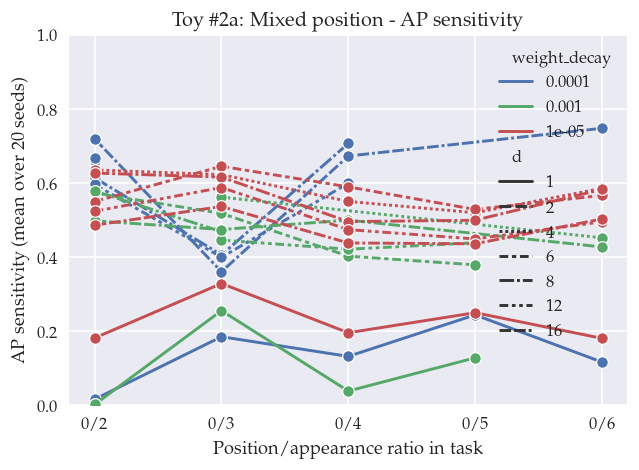

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Palatino"]})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plot_df = df.copy()

plot_df = plot_df[plot_df['lr'] == 4e-2]
plot_df = plot_df[plot_df['target'] == 'pred_class']
plot_df = plot_df[plot_df['attribution_method'] == 'input_gradient_withnegative']


# Show effect of WD
# plot_df = plot_df[plot_df['weight_decay'] >= 1e-5]
# plot_df = plot_df[plot_df['weight_decay'] <= 1e-3]
# plot_df = plot_df[plot_df['pe'] == 'APE']
# plot_df = plot_df[plot_df['d'] == 16]
# plot_df = plot_df[plot_df['n_heads'] == 8]
# plot_df = plot_df[plot_df['input_d'] == 7]
# plot_df = plot_df[plot_df['pos_emb_add'] == 'add']
# plot_df = plot_df[(plot_df['position_mix'] == '6/0') | (plot_df['position_mix'] == '4/2') | (plot_df['position_mix'] == '2/4') | (plot_df['position_mix'] == '0/6')]

# Show effect of PE
# plot_df = plot_df[plot_df['weight_decay'] == 1e-5]
# # plot_df = plot_df[plot_df['weight_decay'] >= 1e-5]
# # plot_df = plot_df[plot_df['weight_decay'] <= 1e-3]
# plot_df = plot_df[plot_df['d'] == 16]
# plot_df = plot_df[plot_df['n_heads'] == 8]
# plot_df = plot_df[plot_df['input_d'] == 7]
# plot_df = plot_df[plot_df['pos_emb_add'] == 'add']
# plot_df = plot_df[(plot_df['position_mix'] == '6/0') | (plot_df['position_mix'] == '4/2') | (plot_df['position_mix'] == '2/4') | (plot_df['position_mix'] == '0/6')]

# Show effect of nr of classes
# plot_df = plot_df[plot_df['d'] == 16]
# plot_df = plot_df[plot_df['n_heads'] == 8]
# plot_df = plot_df[plot_df['weight_decay'] == 1e-4]
# plot_df = plot_df[plot_df['input_d'] == 7]
# plot_df = plot_df[plot_df['pos_emb_add'] == 'add']
# plot_df = plot_df[(plot_df['position_mix'] == '0/2') | (plot_df['position_mix'] == '0/3') | (plot_df['position_mix'] == '0/4') | (plot_df['position_mix'] == '0/5') | (plot_df['position_mix'] == '0/6')]

# Show effect of pos_emb_add
# # plot_df = plot_df[plot_df['weight_decay'] == 1e-4]
# plot_df = plot_df[plot_df['pe'] == 'APE']
# plot_df = plot_df[plot_df['position_mix'] == '0/2']
# plot_df = plot_df[plot_df['input_d'] == 7]
# plot_df = plot_df[plot_df['d'] == 16]
# plot_df = plot_df[plot_df['n_heads'] == 8]

# Show effect of tuning for capacity on varying appearance classes
plot_df = plot_df[plot_df['weight_decay'] >= 1e-5]
plot_df = plot_df[plot_df['weight_decay'] <= 1e-3]
plot_df = plot_df[plot_df['pe'] == 'APE']
# plot_df = plot_df[plot_df['d'] == 16]
# plot_df = plot_df[plot_df['n_heads'] == 8]
# plot_df = plot_df[plot_df['d'] == plot_df['n_heads'] * 2]
plot_df = plot_df[plot_df['d'] == plot_df['n_heads']]
plot_df = plot_df[plot_df['input_d'] == 7]
plot_df = plot_df[plot_df['pos_emb_add'] == 'add']
plot_df = plot_df[(plot_df['position_mix'] == '0/2') | (plot_df['position_mix'] == '0/3') | (plot_df['position_mix'] == '0/4') | (plot_df['position_mix'] == '0/5') | (plot_df['position_mix'] == '0/6')]


plot_df['weight_decay'] = plot_df['weight_decay'].astype(str)
plot_df = plot_df.sort_values(by=['position_mix', 'weight_decay', 'd', 'n_heads'])

fig, axs = plt.subplots(1, 1, figsize=(6, 4), dpi=120)
axs.set_ylim([0, 1])
axs.set_ylabel('AP sensitivity (mean over 20 seeds)')
axs.set_title('Toy \#2a: Mixed position - AP sensitivity')

# Show effect of WD
# sns.lineplot(data=plot_df, x='position_mix', y='mean_total_position', hue='weight_decay', ax=axs, marker='o')
# axs.set_xlabel('Position/appearance ratio in task')

# Show effect of PE
# # sns.lineplot(data=plot_df, x='position_mix', y='mean_total_position', hue='pe', ax=axs, marker='o')
# sns.lineplot(data=plot_df, x='position_mix', y='mean_total_position', hue='weight_decay', style='pe', ax=axs, marker='o')
# axs.set_xlabel('Position/appearance ratio in task')

# Show effect of pos_emb_add
# sns.lineplot(data=plot_df, x='weight_decay', y='mean_total_position', hue='pos_emb_add', ax=axs, marker='o')
# axs.set_xlabel('Weight decay')
# axs.set_xscale('log')

# Show effect of tuning for capacity on varying appearance classes
sns.lineplot(data=plot_df, x='position_mix', y='mean_total_position', hue='weight_decay', style='d', ax=axs, marker='o')
axs.set_xlabel('Position/appearance ratio in task')

# Set max columns to show
pd.set_option('display.max_columns', 50)

plot_df

### Debug APE

In [60]:
%autoreload

# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
pos_emb = 'absolute'
use_rel_pos = False

# Test these settings
lr = 4e-3
# d = 8
# n_heads = 4
seeds = range(10)
d = 16
n_heads = 8
n_epochs = 1000
report_every_n = 1000
sort_by_appearance = False
sort_appearance_by_groups = True

# attribution_methods = ['input_gradient_withnegative', 'input_gradient']
# targets = ['pred_class', 'loss']
attribution_methods = ['input_gradient_withnegative']
targets = ['pred_class']
wds = [1e-4]

for attribution_method in attribution_methods:
    for target in targets:
        for weight_decay in wds:
            # for k, mix in enumerate(settings):
            for k, mix in enumerate(['0/6']):
                print('\n\n')
                print(mix, attribution_method, target, weight_decay)

                # fig, axs = plt.subplots(3, 8, figsize=(1.5 + 4 * 3, 6), dpi=120)

                #     print('\n\n', mix)

                images, labels, n_classes, sort_groups = settings[mix]
                mix_train_images = images.clone()
                mix_train_labels = labels.clone()
                mix_test_images = images.clone()
                mix_test_labels = labels.clone()
                mix_analysis_images = images.clone()
                mix_analysis_labels = labels.clone()
                if not sort_appearance_by_groups:
                    sort_groups = None

                # print([(mix_analysis_labels == c).sum() for c in range(8)])

                # DEBUG: plot
                # j = 0
                # for c in range(n_classes):
                #     for i in range(1):
                #         inds = train_labels == c
                #         axs[k,j].imshow(train_images[inds][i].permute((1, 2, 0)))
                #         axs[k,j].set_title(f"Class {train_labels[inds][i]} (n={inds.sum()})")
                #         axs[k,j].axis('off')
                #         j += 1

                models = run_mixed('mixed_position', seeds, n_epochs, lr, d, n_heads, n_classes, pos_emb, use_rel_pos, mix_train_images, mix_train_labels, mix_test_images, mix_test_labels, mix_analysis_images, mix_analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method, target=target, weight_decay=weight_decay, sort_groups=sort_groups)

UsageError: Line magic function `%autoreload` not found.


/home/robert-jan/surfdrive/experiments/vit-position-info/toy-experiments/../analysis/learned_relative_position.py:170: RuntimeWarning: Mean of empty slice.
  return sf.mean()
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


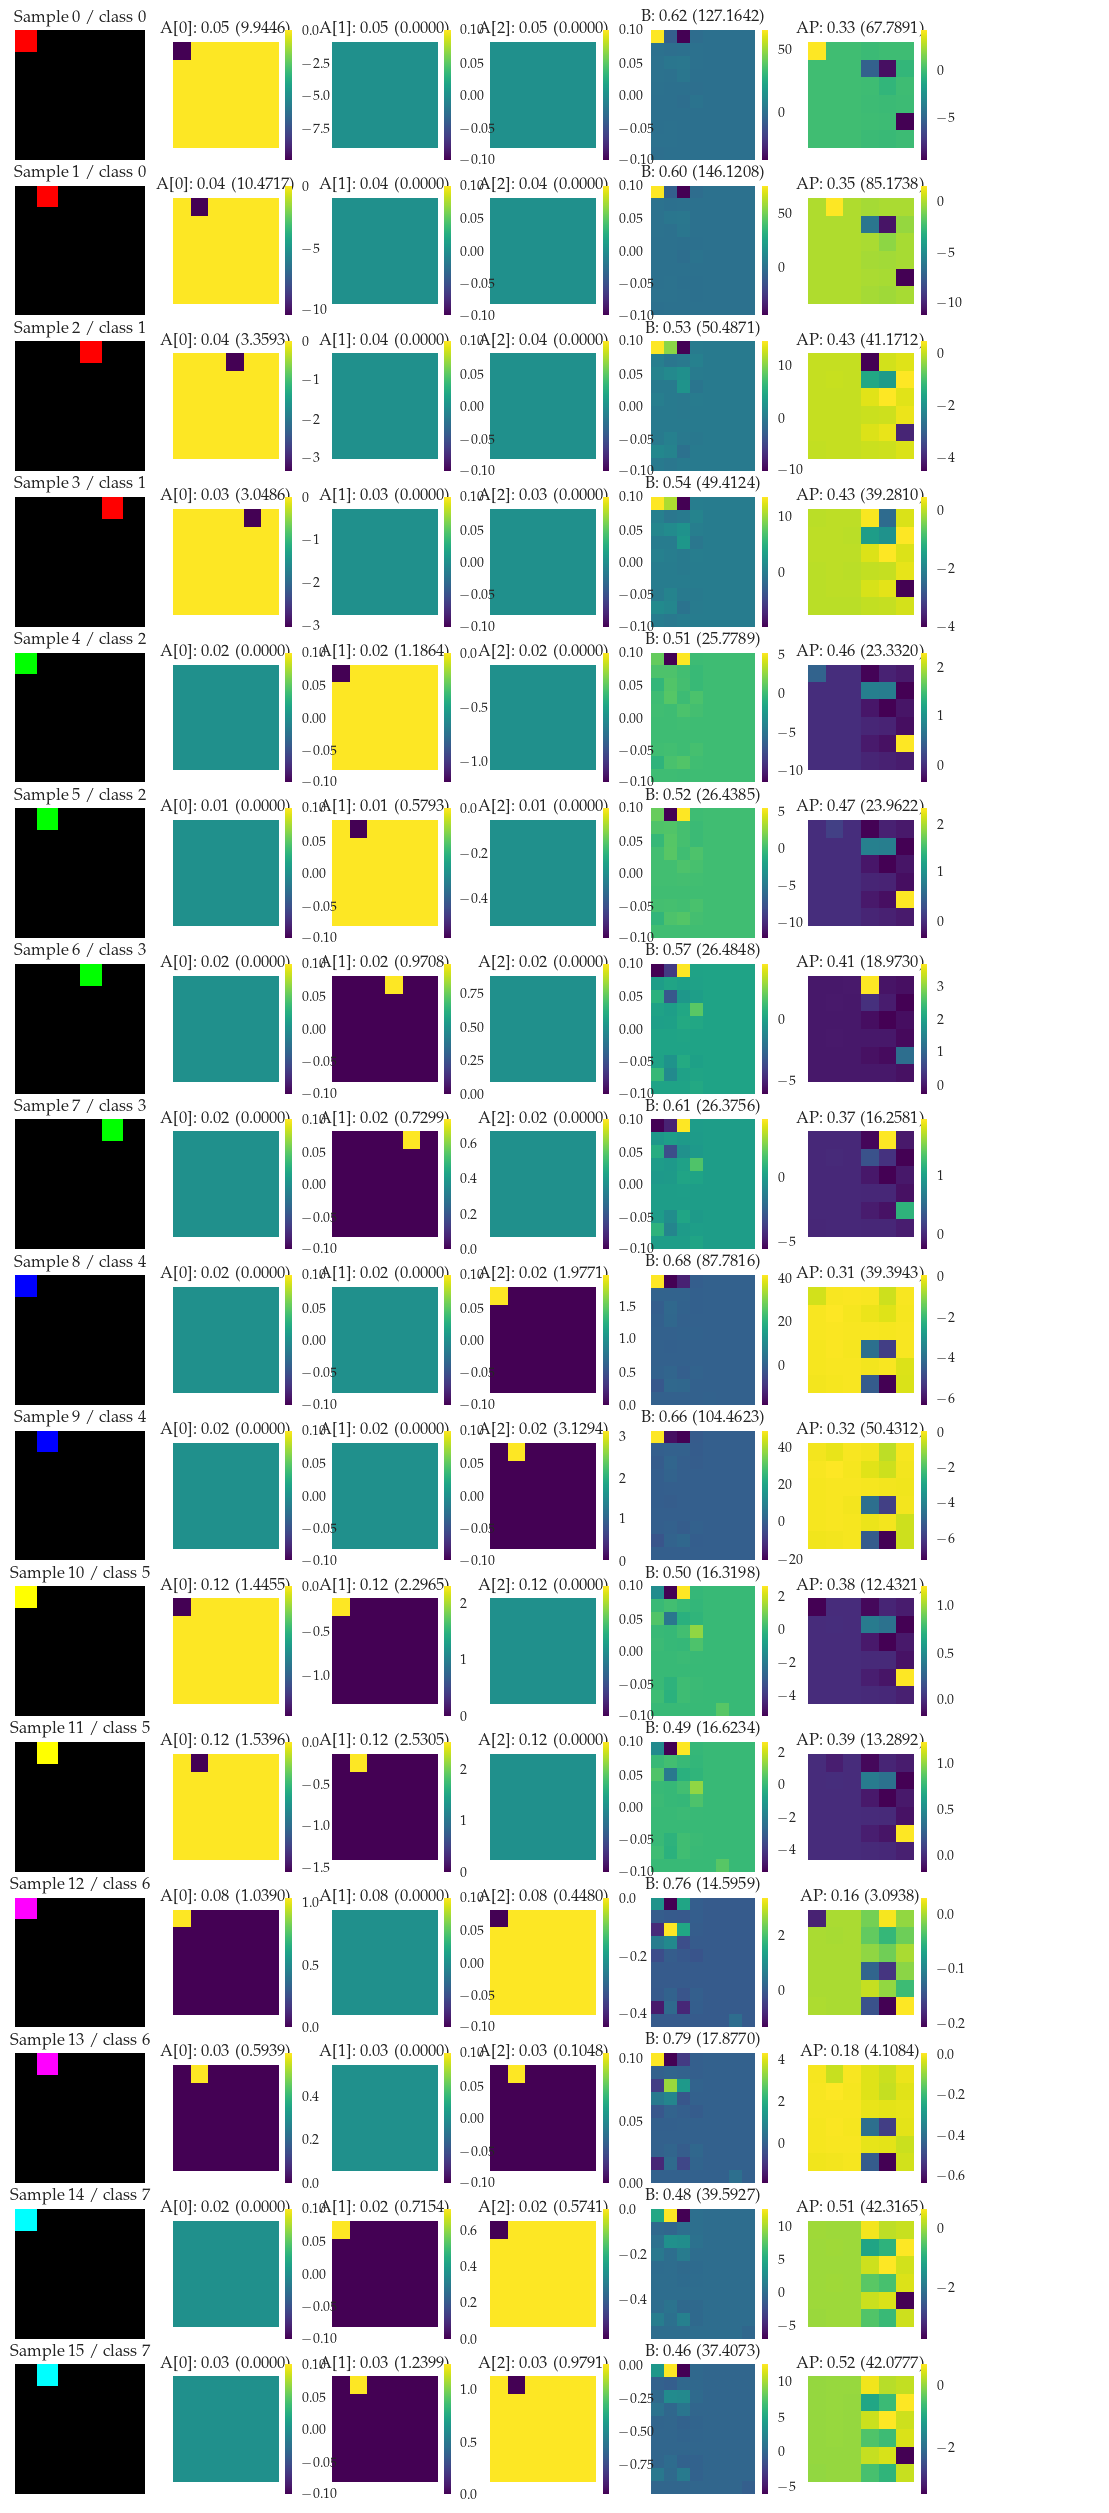

In [28]:
%autoreload
from utils import visualize_sensitivities

seed = 0

# print([(analysis_labels == c).sum() for c in range(8)])

# c = 5
# inds = analysis_labels == c
# c_analysis_images = analysis_images[inds]
# c_analysis_labels = analysis_labels[inds]

plot_images = []
plot_labels = []
n = 2
for c in range(8):
    inds = analysis_labels == c
    c_analysis_images = analysis_images[inds][:n]
    c_analysis_labels = analysis_labels[inds][:n]
    plot_images.append(c_analysis_images)
    plot_labels.append(c_analysis_labels)

plot_images = torch.concat(plot_images)
plot_labels = torch.concat(plot_labels)

n = len(plot_images)
# manual_sort = [
#     0, 7, 14, 21, 28,
#     2, 9, 16, 23, 30,
#     4, 11, 18, 25, 32,
#     6, 13, 20, 27, 34,
#     1, 8, 15, 22, 29,
#     3, 10, 17, 24, 31,
#     5, 12, 19, 26, 33,
# ]
# sort = 'appearance'
sort = None
plot_codomain = 'none'

visualize_sensitivities(models[seed], seed, plot_images, plot_labels, ape=True, rpe=False, sort=sort, n=n, plot_codomain=plot_codomain)


### No PE - with negative

In [12]:
# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
# d = 1
# n_heads = 1
n_classes = 4
pos_emb = 'none'
use_rel_pos = False

# Test these settings
d = 4
n_heads = 2
n_epochs = 1000
report_every_n = 250
# seeds = [0]

run_mixed(seeds, n_epochs, lr, d, n_heads, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

Epoch 0: 1.496724247932434
Epoch 250: 0.6933881044387817


KeyboardInterrupt: 

### APE - all mixes

In [95]:
%autoreload

# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
# d = 1
# n_heads = 1
n_classes = 4
pos_emb = 'absolute'
use_rel_pos = False

# Test these settings
lr = 4e-3
d = 4
n_heads = 2
seeds = range(5)
n_epochs = 1000
report_every_n = 1000
attribution_method = 'input_gradient_withnegative'
sort_by_appearance = False

for mix in settings:
    print('\n\n', mix)
    images, labels, n_classes = settings[mix]
    train_images = images
    train_labels = labels
    test_images = images
    test_labels = labels
    analysis_images = images
    analysis_labels = labels

    models = run_mixed(seeds, n_epochs, lr, d, n_heads, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method, sort_by_appearance=sort_by_appearance)



 0.75
Epoch 0: 2.269742488861084
Epoch 999: 0.00019789088401012123
Accuracy: 1.0


/home/robert-jan/surfdrive/experiments/vit-position-info/toy-experiments/../analysis/learned_relative_position.py:170: RuntimeWarning: Mean of empty slice.
  return sf.mean()
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 0: 2.2083513736724854
Epoch 999: 0.00010512451262911782
Accuracy: 1.0
Epoch 0: 2.079305410385132
Epoch 999: 0.00014231816749088466
Accuracy: 1.0
Epoch 0: 2.168071746826172
Epoch 999: 0.0002931076451204717
Accuracy: 1.0
Epoch 0: 2.0152268409729004
Epoch 999: 0.00012462935410439968
Accuracy: 1.0

Without bias:
appearance (all): 44.61 +- 12.01 (48.06, 45.28, 44.59, 61.27, 23.83)
appearance (c0) : 29.84 +- 16.91 (45.81, 28.70, 51.04, 5.68, 17.99)
appearance (c1) : 39.25 +- 23.90 (65.73, 12.10, 59.80, 49.31, 9.33)
appearance (c2) : 32.54 +- 9.75 (34.48, 22.26, 40.58, 44.97, 20.43)
appearance (c3) : 36.97 +- 17.57 (59.04, 15.76, 40.33, 51.98, 17.73)
appearance (c4) : 38.04 +- 21.77 (37.53, 55.20, 10.77, 68.58, 18.10)
appearance (c5) : 34.31 +- 18.17 (25.37, 35.84, 12.55, 67.19, 30.58)
appearance (c6) : 56.94 +- 20.29 (53.06, 50.62, 72.69, 83.67, 24.69)
appearance (c7) : 60.61 +- 20.78 (53.27, 90.84, 42.75, 78.81, 37.37)
position (all): 55.39 +- 12.01 (51.94, 54.72, 55.41, 38.73, 76.17)

/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 999: 0.00011604355677263811
Accuracy: 1.0
Epoch 0: 2.179539680480957
Epoch 999: 7.266892498591915e-05
Accuracy: 1.0
Epoch 0: 2.1334228515625
Epoch 999: 0.00010389481030870229
Accuracy: 1.0
Epoch 0: 2.1176602840423584
Epoch 999: 0.00017370098794344813
Accuracy: 1.0
Epoch 0: 2.0516321659088135
Epoch 999: 6.447858322644606e-05
Accuracy: 1.0

Without bias:
appearance (all): 42.02 +- 17.58 (11.39, 47.42, 46.13, 39.60, 65.57)
appearance (c0) : 34.01 +- 20.46 (12.24, 58.72, 10.56, 33.13, 55.39)
appearance (c1) : 34.63 +- 18.64 (7.16, 57.69, 25.79, 29.32, 53.21)
appearance (c2) : 37.74 +- 18.15 (4.72, 47.51, 55.32, 32.32, 48.81)
appearance (c3) : 34.93 +- 15.53 (4.57, 38.23, 42.34, 41.22, 48.29)
appearance (c4) : 34.49 +- 22.47 (3.03, 26.48, 42.37, 28.97, 71.62)
appearance (c5) : 40.80 +- 16.21 (17.82, 37.88, 57.03, 30.36, 60.91)
appearance (c6) : 60.00 +- 15.98 (31.05, 77.19, 56.67, 64.54, 70.56)
appearance (c7) : 46.18 +- 27.31 (2.07, 41.87, 53.71, 45.74, 87.51)
position (all): 57.98 +

### APE - fix zero grad

In [68]:
%autoreload

# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
# d = 1
# n_heads = 1
n_classes = 4
pos_emb = 'absolute'
use_rel_pos = False

# Test these settings
lr = 4e-3
d = 4
n_heads = 2
# seeds = [0]
# n_epochs = 1000
# report_every_n = 250
attribution_method = 'input_gradient_withnegative'

models = run_mixed(seeds, n_epochs, lr, d, n_heads, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method)

Epoch 0: 1.4624220132827759
Epoch 2000: 4.1283350583398715e-05
Epoch 3999: 7.119409929146059e-06
Accuracy: 1.0
Epoch 0: 1.4174225330352783
Epoch 2000: 1.7154388842754997e-05
Epoch 3999: 3.1358617889054585e-06
Accuracy: 1.0
Epoch 0: 1.4233802556991577
Epoch 2000: 0.00027819909155368805
Epoch 3999: 2.9541733965743333e-05
Accuracy: 1.0
Epoch 0: 1.4180805683135986
Epoch 2000: 0.00020066177239641547
Epoch 3999: 3.087780351052061e-05
Accuracy: 1.0
Epoch 0: 1.3898123502731323
Epoch 2000: 1.874213558039628e-05
Epoch 3999: 3.4454724300303496e-06
Accuracy: 1.0
Epoch 0: 1.4453177452087402
Epoch 2000: 1.921067450894043e-05
Epoch 3999: 3.322952125017764e-06
Accuracy: 1.0
Epoch 0: 1.4123096466064453
Epoch 2000: 2.0420991859282367e-05
Epoch 3999: 3.620975803642068e-06
Accuracy: 1.0
Epoch 0: 1.4996757507324219
Epoch 2000: 1.9121229342999868e-05
Epoch 3999: 3.438848352743662e-06
Accuracy: 1.0
Epoch 0: 1.4662789106369019
Epoch 2000: 1.3304975254868623e-05
Epoch 3999: 2.7368425890017534e-06
Accuracy: 1.0

### RPE - fix zero grad

In [69]:
# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
# d = 1
# n_heads = 1
n_classes = 2
pos_emb = 'none'
use_rel_pos = True

# Test these settings
lr = 4e-3
d = 4
n_heads = 2

run_absolute_position(seeds, n_epochs, lr, d, n_heads, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

NameError: name 'run_absolute_position' is not defined

### APE+RPE - fix zero grad

In [ ]:
# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
# d = 1
# n_heads = 1
n_classes = 2
pos_emb = 'absolute'
use_rel_pos = True

# Test these settings
lr = 4e-2
d = 4
n_heads = 2

run_absolute_position(seeds, n_epochs, lr, d, n_heads, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')